# Report: Clustering 

## Task: 
During this work, students need: 

1. Select a dataset for research yourself. It is recommended to use sklearn.datasets or Kaggle (in this case, be sure to attach it to the answer)
2. Analyze this dataset using the Pandas library in order to detect gaps in the data and outliers in the data. If they are detected, it is necessary to process these data points
3. Use the K-means clustering algorithm to cluster the data.
4. Analyze the results and select the optimal metrics for calculating distances and the number of clusters

- **Student**: Jingyu Yan

## Solutions

### 1. Select a dataset

I chose to use the **wine dataset** from sklearn.datasets for this experiment.

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load 'wine_data' datasets
wine_data = datasets.load_wine()
# Create DataFrame
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

Show the basic information about the dataset.

In [2]:
# Look at the first 10 rows of data
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [3]:
# View features
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
# Information
print("Data shape:", wine_df.shape)
print("Label shape:", wine_data.target.shape)
print("Label classification type:", set(wine_data.target))
print("Label names:", set(wine_data.target_names))

Data shape: (178, 13)
Label shape: (178,)
Label classification type: {0, 1, 2}
Label names: {'class_1', 'class_2', 'class_0'}


We found that this dataset consists of a total of **13** feature values, comprising **178** data items in total, and set up **3** types of classification as labels.

### 2. Analyze Dataset
To begin analyzing the data, one first needs to check the data set for outliers or missing values.

In [5]:
def check_missing_values(df):
    """
    Check for missing values in the DataFrame.
    """
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_percentage = missing_values / len(df) * 100
    
    if missing_values.empty:
        print("No missing values were detected。")
        return None
    
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    return missing_df

miss_check_ret = check_missing_values(wine_df)
miss_check_ret

No missing values were detected。


We use the Z-score, and if outliers are found, we replace these outliers with the average values of each feature.

In [6]:
from scipy import stats

def handle_outliers(df):
    """
    Outliers were identified using the Z-score method and these were replaced by the mean of each feature.
    """
    df_copy = df.copy()
    z_scores = np.abs(stats.zscore(df_copy))
    threshold = 3
    outlier_positions = np.where(z_scores > threshold)
    
    for row, col in zip(*outlier_positions):
        column_name = df_copy.columns[col]
        mean_val = df_copy[column_name].mean()
        df_copy.iloc[row, col] = mean_val
        
    return df_copy

processed_df = handle_outliers(wine_df)
processed_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


We use min-max normalization to standardize each feature, which is the most common method of standardization.
$$X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$


In [7]:
def min_max_normalization(df):
    """
    All numerical features in Pandas DataFrame were Min-Max normalized.
    """
    normalized_df = df.copy()
    
    for column in normalized_df.columns:
        if pd.api.types.is_numeric_dtype(normalized_df[column]):
            min_val = normalized_df[column].min()
            max_val = normalized_df[column].max()
            normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
    
    return normalized_df

norm_df = min_max_normalization(processed_df)
norm_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.197556,0.598361,0.279330,0.826087,0.627586,0.757660,0.283019,0.655052,0.416428,0.577320,0.970696,0.561341
1,0.571053,0.211813,0.360656,0.033520,0.434783,0.575862,0.674095,0.245283,0.303136,0.296084,0.587629,0.780220,0.550642
2,0.560526,0.329939,0.795082,0.446927,0.449275,0.627586,0.807799,0.320755,0.836237,0.420248,0.567010,0.695971,0.646933
3,0.878947,0.246436,0.655738,0.346369,0.623188,0.989655,0.877437,0.207547,0.616725,0.622732,0.391753,0.798535,0.857347
4,0.581579,0.376782,0.959016,0.581006,0.695652,0.627586,0.654596,0.490566,0.491289,0.290353,0.577320,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,1.000000,0.614754,0.553073,0.362319,0.241379,0.075209,0.735849,0.226481,0.613181,0.164948,0.172161,0.329529
174,0.623684,0.645621,0.639344,0.692737,0.463768,0.282759,0.114206,0.566038,0.348432,0.574976,0.226804,0.106227,0.336662
175,0.589474,0.720978,0.459016,0.525140,0.724638,0.210345,0.097493,0.566038,0.327526,0.851958,0.113402,0.106227,0.397290
176,0.563158,0.376782,0.549180,0.525140,0.724638,0.231034,0.094708,0.754717,0.365854,0.765998,0.123711,0.128205,0.400856


As observed, the data distribution after normalization lies within the range of 0 to 1, indicating normalized floating-point numbers. In essence, normalization should not alter the underlying data distribution. Hence, we sample the data to illustrate the distribution.

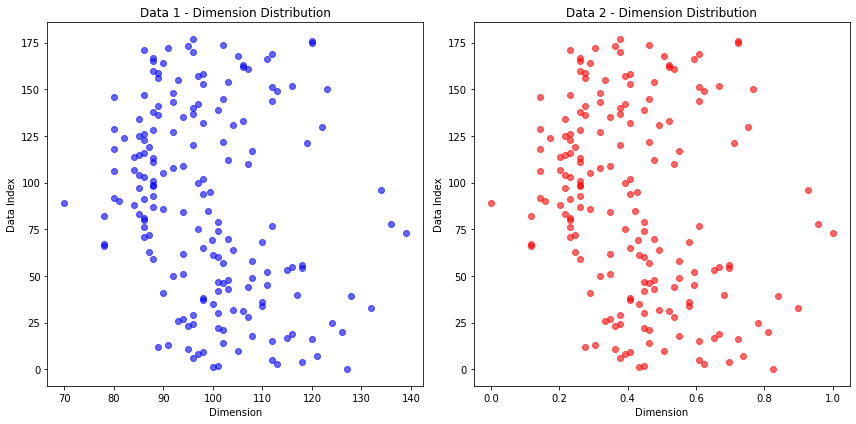

In [8]:
def plot_dimension_comparison(data1, data2, label1="Data 1", label2="Data 2", dimension_name="Dimension"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].scatter(data1, range(len(data1)), label=label1, color='blue', alpha=0.6)
    axes[0].set_xlabel(dimension_name)
    axes[0].set_ylabel('Data Index')
    axes[0].set_title(f'{label1} - {dimension_name} Distribution')

    axes[1].scatter(data2, range(len(data2)), label=label2, color='red', alpha=0.6)
    axes[1].set_xlabel(dimension_name)
    axes[1].set_ylabel('Data Index')
    axes[1].set_title(f'{label2} - {dimension_name} Distribution')

    plt.tight_layout()
    plt.show()

# Displaying the comparison distribution plot of the "magnesium" feature before and after normalization.
magnesium_index = 4
plot_dimension_comparison(
    processed_df.to_numpy()[:, magnesium_index], norm_df.to_numpy()[:, magnesium_index])

From the image, it can be observed that the data distribution remains consistent without any deformation.

Here, we complete the actions of data analysis and data preprocessing.

### 3. K-means clustering

Use the K-means clustering algorithm to cluster the data.We implement a KMeans class to conduct this experiment and adopt L1 and L2 distance functions as two distance metrics to calculate the distances between data points and centroids.

In [9]:
import numpy as np
from sklearn.metrics import silhouette_score

class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, distance_func=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        # If no distance function is specified, Euclidean distance is used
        self.distance_func = distance_func if distance_func is not None else self.euclidean_distance
        self.centroids = None

    @staticmethod
    def euclidean_distance(a, b):
        if a.ndim == 1:
            a = a.reshape(1, -1)
        if b.ndim == 1:
            b = b.reshape(1, -1)
        return np.sqrt(np.sum((a - b) ** 2, axis=1))
    
    @staticmethod
    def manhattan_distance(a, b):
        if a.ndim == 1:
            a = a.reshape(1, -1)
        if b.ndim == 1:
            b = b.reshape(1, -1)
        return np.sum(np.abs(a - b), axis=1)
    
    def compute_sse(self, X):
        distances = np.array([np.min([np.sum((x - centroid) ** 2) for centroid in self.centroids]) for x in X])
        sse = np.sum(distances)
        return sse
    
    def fit(self, X):
        # Randomly initialize the cluster center
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]

        for _ in range(self.max_iters):
            # Assignment step: Assign the nearest cluster center to each sample
            clusters = np.array([np.argmin([self.distance_func(x, centroid) for centroid in self.centroids]) for x in X])
            
            # Update step: Calculate the new cluster center
            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.n_clusters)])
            
            # Check for convergence (whether the cluster center no longer changes)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        # Cluster label prediction is performed on the given data
        predictions = np.array([np.argmin([self.distance_func(x, centroid) for centroid in self.centroids]) for x in X])
        return predictions


Implement a fitting function to execute computation and plot the data during the calculation process.

In [10]:
def kmeans_fitting(X, k_range, iters, distance_func):
    """
    Processing and view.
    """
    silhouette_avg_scores = []
    sse_scores = []
    for n_clusters in k_range:
        kmeans = KMeans(n_clusters=n_clusters, max_iters=iters, distance_func=distance_func)
        kmeans.fit(X)
        cluster_labels = kmeans.predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)
        sse = kmeans.compute_sse(X)
        sse_scores.append(sse)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse_scores, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_avg_scores, marker='o')
    plt.title('Silhouette Coefficients')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.show()

#### Use L1-distance fitting

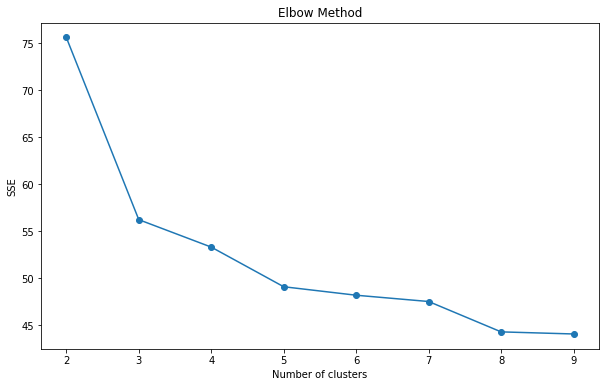

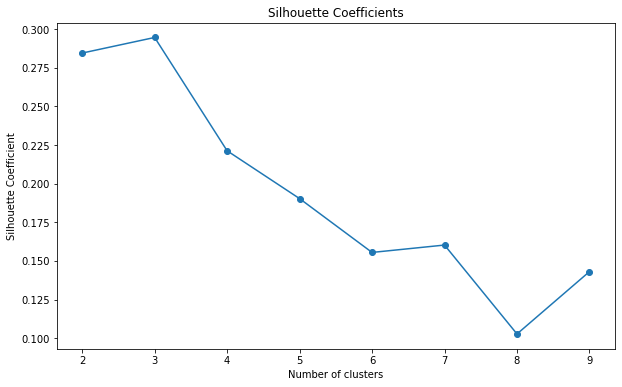

In [11]:
L1 = KMeans.manhattan_distance
L2 = KMeans.euclidean_distance
k_range = list(range(2, 10))

kmeans_fitting(norm_df.to_numpy(), k_range, 100, L1)

#### Use L2-distance fitting

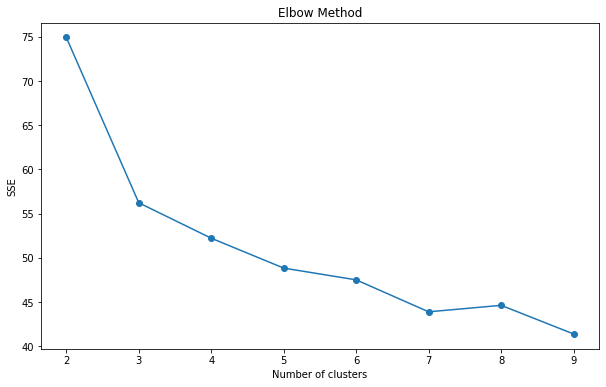

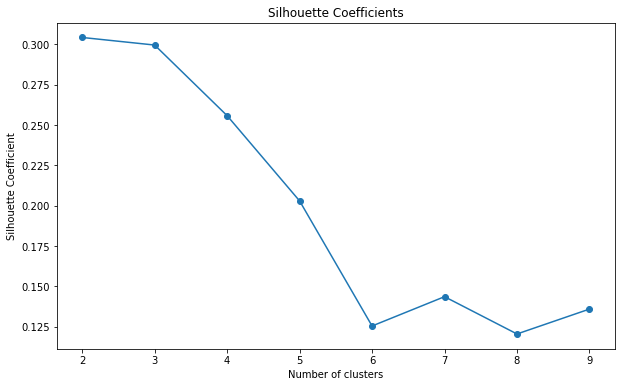

In [12]:
L1 = KMeans.manhattan_distance
L2 = KMeans.euclidean_distance
k_range = list(range(2, 10))

kmeans_fitting(norm_df.to_numpy(), k_range, 100, L2)

### 4. Analyze the results

Based on the above analysis and some prior knowledge, we select **k=3** as the optimal number of clusters.



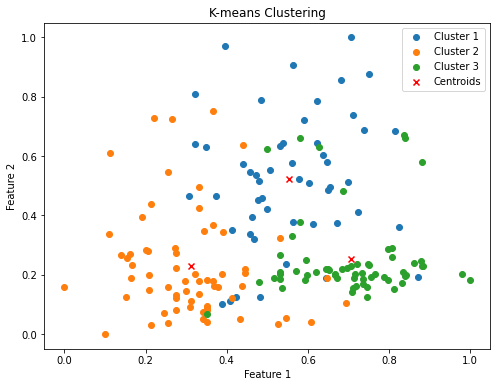

In [13]:
X = norm_df.to_numpy()

# Initialize the K-means model
kmeans = KMeans(n_clusters=3)

# fitting
kmeans.fit(X)
labels = kmeans.predict(X)

# Get the cluster center
centroids = kmeans.centroids

# Plot the clustering results
plt.figure(figsize=(8, 6))
for i in range(kmeans.n_clusters):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### 5. Extended: Use the KNN classification algorithm

This is a dataset with multiple class labels. We attempt to implement a KNN classifier to conduct a classification experiment.

In [14]:
import numpy as np

class KNN:
    def __init__(self, k=3, loss='L2'):
        self.k = k
        if loss == 'L1':
            self.loss_func = self.manhattan_distance
        elif loss == 'L2':
            self.loss_func = self.euclidean_distance
        else:
            raise NotImplemented

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    @staticmethod
    def euclidean_distance(a, b):
        return np.sqrt(np.sum((a - b) ** 2, axis=1))
    
    @staticmethod
    def manhattan_distance(a, b):
        return np.sum(np.abs(a - b), axis=1)

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Calculate the distance between the test sample and all the training samples
            distances = self.loss_func(x, self.X_train)
            # The index of the nearest k samples is obtained
            nearest_indices = np.argsort(distances)[:self.k]
            # Get the labels of these k samples
            nearest_labels = self.y_train[nearest_indices]
            # The predictive labels of the test sample are determined according to the voting mechanism
            pred_label = np.argmax(np.bincount(nearest_labels))
            y_pred.append(pred_label)
        return np.array(y_pred)
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy

We employ cross-validation techniques, such as K-fold cross-validation, to assess various values of K. In each fold, the dataset is partitioned into training and validation sets, followed by evaluating the model's performance on the validation set. Finally, the optimal value of K is determined by averaging the accuracy or other performance metrics across folds.

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def k_fold_cross_validation(knn: KNN, X, y, train_rate=0.8, k_values=[3, 5, 7, 9, 11]):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    best_k = None
    best_accuracy = 0.0

    # Model performance under different values of K was evaluated using cross validation
    for k in k_values:
        knn.k = k
        accuracies = []
        for train_index, test_index in kf.split(X):
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y[train_index], y[test_index]

            # fitting
            knn.fit(X_train, y_train)

            # pridict
            y_pred = knn.predict(X_val)

            # acc
            accuracy = accuracy_score(y_val, y_pred)
            accuracies.append(accuracy)

        # mean
        mean_accuracy = np.mean(accuracies)
        print(f"K is {k}, Cross validation accuracy: {mean_accuracy:.4f}")

        # Update best k value
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_k = k

    print(f"\nBest k value: {best_k} with accuracy: {best_accuracy:.4f}")

In [16]:
# Set label
y = wine_data.target

#### Use L1-distance

In [17]:
knn_l1 = KNN(loss='L1')
k_fold_cross_validation(knn_l1, X, y, k_values=[3, 5, 7, 9, 11])

K is 3, Cross validation accuracy: 0.9776
K is 5, Cross validation accuracy: 0.9662
K is 7, Cross validation accuracy: 0.9662
K is 9, Cross validation accuracy: 0.9719
K is 11, Cross validation accuracy: 0.9721

Best k value: 3 with accuracy: 0.9776


#### Use L2-distance

In [18]:
knn_l2 = KNN(loss='L2')
k_fold_cross_validation(knn_l2, X, y, k_values=[3, 5, 7, 9, 11])

K is 3, Cross validation accuracy: 0.9719
K is 5, Cross validation accuracy: 0.9606
K is 7, Cross validation accuracy: 0.9662
K is 9, Cross validation accuracy: 0.9717
K is 11, Cross validation accuracy: 0.9606

Best k value: 3 with accuracy: 0.9719


Based on the above implementation, it was found that using L1 and L2 as the distance metrics for KNN, the experimental results indicate that the optimal value of k is 3.

#### Conclusion

Based on the above analysis, we can conclude that in simple datasets with relatively low inter-feature correlations, the performance of the KNN algorithm may not be significantly affected by the choice of distance metric.  In such scenarios, even when using L1 and L2 norms as distance metrics, the classification results may not differ much.  Therefore, the choice of distance metric may not significantly impact the algorithm's performance.